In [2]:
from tensorflow.keras.layers import Input,Dense,LSTM,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import TensorBoard


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [3]:
df = []

markets = ["AUDUSD","EURGBP","EURUSD","GBPUSD","USDCAD","USDCHF","XAUUSD"]

for market in  markets:
  df.append(pd.read_csv("/content/drive/MyDrive/forex data/metatrader 5 data H1/"+market+" dbot.csv"))

In [4]:
print(len(df))

7


In [5]:
n = 0 ## to select the market we want

In [6]:
df[n].head()

,Time,Open,Close,Tick Volume
0,1186617600,0.8621,0.8628,125
1,1186621200,0.8627,0.8631,119
2,1186624800,0.8632,0.8628,113
3,1186628400,0.8630,0.8644,232
4,1186632000,0.8645,0.8645,107


In [7]:
# Change the position of the 'B' column
df[n] = df[n][['Time', 'Open', 'Tick Volume', 'Close']]
df[n].head()

,Time,Open,Tick Volume,Close
0,1186617600,0.8621,125,0.8628
1,1186621200,0.8627,119,0.8631
2,1186624800,0.8632,113,0.8628
3,1186628400,0.8630,232,0.8644
4,1186632000,0.8645,107,0.8645


In [8]:
x = df[n].values


np.set_printoptions(formatter={'float_kind': '{:.5f}'.format})
print(x)


[[1186617600.00000 0.86210 125.00000 0.86280]
 [1186621200.00000 0.86270 119.00000 0.86310]
 [1186624800.00000 0.86320 113.00000 0.86280]
 ...
 [1695898800.00000 0.63683 2296.00000 0.63778]
 [1695902400.00000 0.63777 2305.00000 0.63875]
 [1695906000.00000 0.63876 209.00000 0.63888]]


In [9]:
sc_x = StandardScaler()

x = sc_x.fit_transform(x)

print(x)

[[-1.73677 0.35675 -1.25600 0.36229]
 [-1.73674 0.36150 -1.25901 0.36467]
 [-1.73672 0.36545 -1.26202 0.36229]
 ...
 [1.72788 -1.42485 -0.16697 -1.41735]
 [1.72791 -1.41742 -0.16245 -1.40968]
 [1.72793 -1.40959 -1.21386 -1.40865]]


In [10]:
wcss = []
for i in range(1,40):
  kmeans = KMeans(n_clusters = i, init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

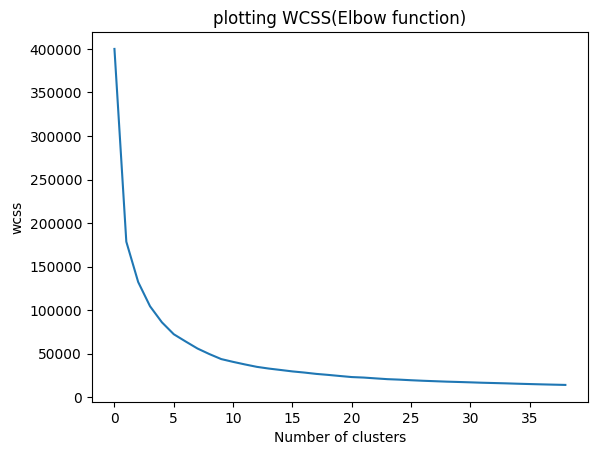

In [11]:
plt.title("plotting WCSS(Elbow function)")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.plot(wcss)
plt.show

In [17]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 0 0 0]


In [18]:
print(x[0,3])

0.3622928077549934


In [19]:
x1_k = []
y1_k = []

x2_k = []
y2_k = []

x3_k = []
y3_k = []

x4_k = []
y4_k = []

x5_k = []
y5_k = []

x6_k = []
y6_k = []

x7_k = []
y7_k = []

x8_k = []
y8_k = []

x9_k = []
y9_k = []

x10_k = []
y10_k = []




for i in range(len(y_kmeans)):
  if(y_kmeans[i] == 0):
    x1_k.append([i])
    y1_k.append(x[i,3:])
  if(y_kmeans[i] == 1):
    x2_k.append([i])
    y2_k.append(x[i,3:])
  if(y_kmeans[i] == 2):
    x3_k.append([i])
    y3_k.append(x[i,3:])

  if(y_kmeans[i] == 3):
    x4_k.append([i])
    y4_k.append(x[i,3:])
  if(y_kmeans[i] == 4):
    x5_k.append([i])
    y5_k.append(x[i,3:])

  if(y_kmeans[i] == 5):
    x6_k.append([i])
    y6_k.append(x[i,3:])
  if(y_kmeans[i] == 6):
    x7_k.append([i])
    y7_k.append(x[i,3:])
  if(y_kmeans[i] == 7):
    x8_k.append([i])
    y8_k.append(x[i,3:])
  if(y_kmeans[i] == 8):
    x9_k.append([i])
    y9_k.append(x[i,3:])
  if(y_kmeans[i] == 9):
    x10_k.append([i])
    y10_k.append(x[i,3:])



print(x2_k[-1])

[47946]


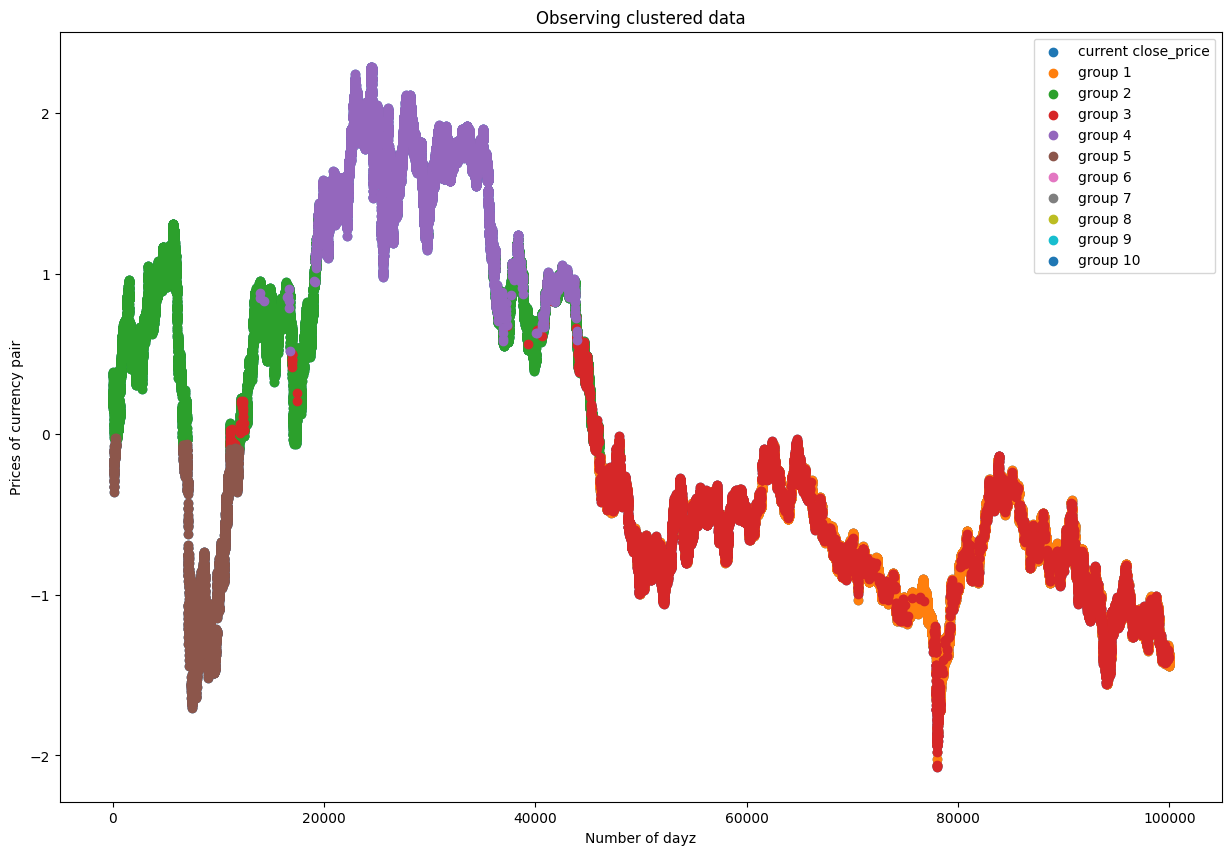

In [20]:
plt.figure(figsize=(15, 10))
plt.title("Observing clustered data")
plt.xlabel("Number of dayz")
plt.ylabel("Prices of currency pair")

x_point = []
for i in range(len(x)):
  t = [i]
  x_point.append(t)
plt.scatter(x_point, x[:,3:], label="current close_price")

plt.scatter(x1_k, y1_k, label="group 1")
plt.scatter(x2_k, y2_k, label="group 2")
plt.scatter(x3_k, y3_k, label="group 3")

plt.scatter(x4_k, y4_k, label="group 4")
plt.scatter(x5_k, y5_k, label="group 5")

plt.scatter(x6_k, y6_k, label="group 6")
plt.scatter(x7_k, y7_k, label="group 7")

plt.scatter(x8_k, y8_k, label="group 8")
plt.scatter(x9_k, y9_k, label="group 9")

plt.scatter(x10_k, y10_k, label="group 10")


plt.legend()
plt.show()
